## Goal of this notebook
 - Plot KDE (kernel density estimate) of distributions after each movement category
 - Take a look at the mean, variance, and level of normality of these curves

In [1]:
from stock_utils import *

In [2]:
df = pd.DataFrame()
df = df.from_csv('stock_data/spy.csv')
daily_movements = get_price_movement_percentages(df)
movement_categories = categorize_movements(daily_movements)

In [3]:
def get_trends_linear(movement_categories, movement_percentages, trend_length):
    """
    Given a list of movement categories, a list of movement percentages, and
    the length of the trend we are looking for, return a list of trend_length-1
    tuples containing trend categories and then the following days movement percentage.

    e.g. We have categories = ['a', 'b', 'a', 'c', 'a'], and associated movement percentages 
         [-1, 1, -2, 5, -1]. If the trend_length we are looking at is 2, we would get
         [('a',1), ('b',-2), ('a',5), ('c',-1)] 

         If instead, trend_length was 3, we would have [('a_b', -2), ('b_a', 5), ('a_c', -1)].
    """
    trends = []
    for i in range(len(movement_categories) - trend_length + 1):
        trend_string = movement_categories[i]
        counter = 1
        for _ in range(trend_length - 2):
            trend_string += '_' + movement_categories[i+counter]
            counter += 1
        trend_and_movement = (trend_string, movement_percentages[i+counter])
        trends.append(trend_and_movement)
    return trends

In [4]:
def get_movements_after_trend(trend, trends_and_movements):
    """Get all stock movement percentages after the given trend is observed"""
    movements_after_trend = []
    for i in range(len(trends_and_movements)):
        if trend == trends_and_movements[i][0]:
            movements_after_trend.append(trends_and_movements[i][1])
            
    return movements_after_trend

In [5]:
two_day_trends = get_trends(movement_categories, 2)
two_day_trends_linear = get_trends_linear(movement_categories, daily_movements, 2)
#three_day_trends_linear = get_trends_linear(movement_categories, daily_movements, 3)

In [6]:
all_cats = ['bd', 'sd', 'sg', 'bg']
movements_after_category = []
for cat in all_cats:
    movements_after_category.append(get_movements_after_trend(cat, two_day_trends_linear))
    
print(len(movements_after_category[0]))
print(len(movements_after_category[1]))
print(len(movements_after_category[2]))
print(len(movements_after_category[3]))
print()
print(count_movement_category(movement_categories, 'bd'))
print(count_movement_category(movement_categories, 'sd'))
print(count_movement_category(movement_categories, 'sg'))
print(count_movement_category(movement_categories, 'bg'))

252
964
1081
221

252
965
1081
221


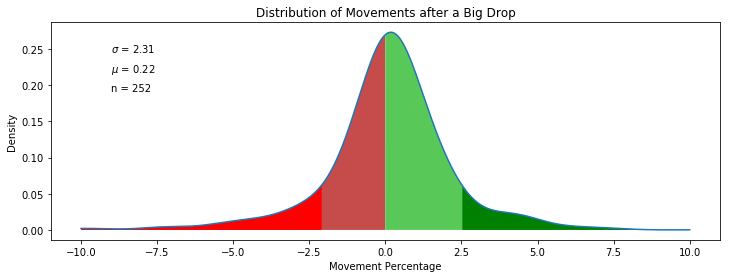

In [7]:
plt.figure(figsize=(12,4))
x = movements_after_category[0]
n = len(movements_after_category[0])
plot_gaussian_categorical(x, title="Distribution of Movements after a Big Drop", n_cats=4, n_data=n)
plt.show()

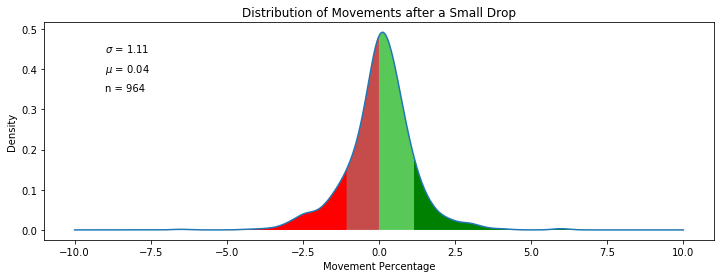

In [8]:
plt.figure(figsize=(12,4))
x = movements_after_category[1]
n = len(movements_after_category[1])
plot_gaussian_categorical(x, title="Distribution of Movements after a Small Drop", n_cats=4, n_data=n)
plt.show()

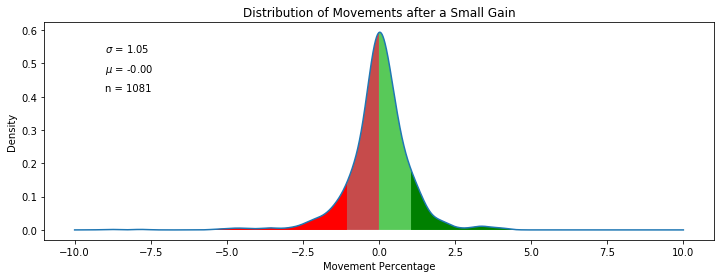

In [9]:
plt.figure(figsize=(12,4))
x = movements_after_category[2]
n = len(movements_after_category[2])
plot_gaussian_categorical(x, title="Distribution of Movements after a Small Gain", n_cats=4, n_data=n)
plt.show()

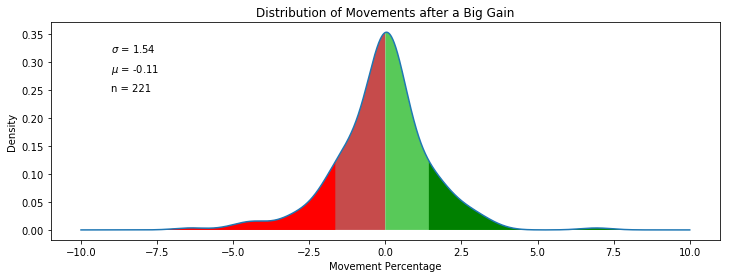

In [10]:
plt.figure(figsize=(12,4))
x = movements_after_category[3]
n = len(movements_after_category[3])
plot_gaussian_categorical(x, title="Distribution of Movements after a Big Gain", n_cats=4, n_data=n)
plt.show()

# All Stocks

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
             BAC
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



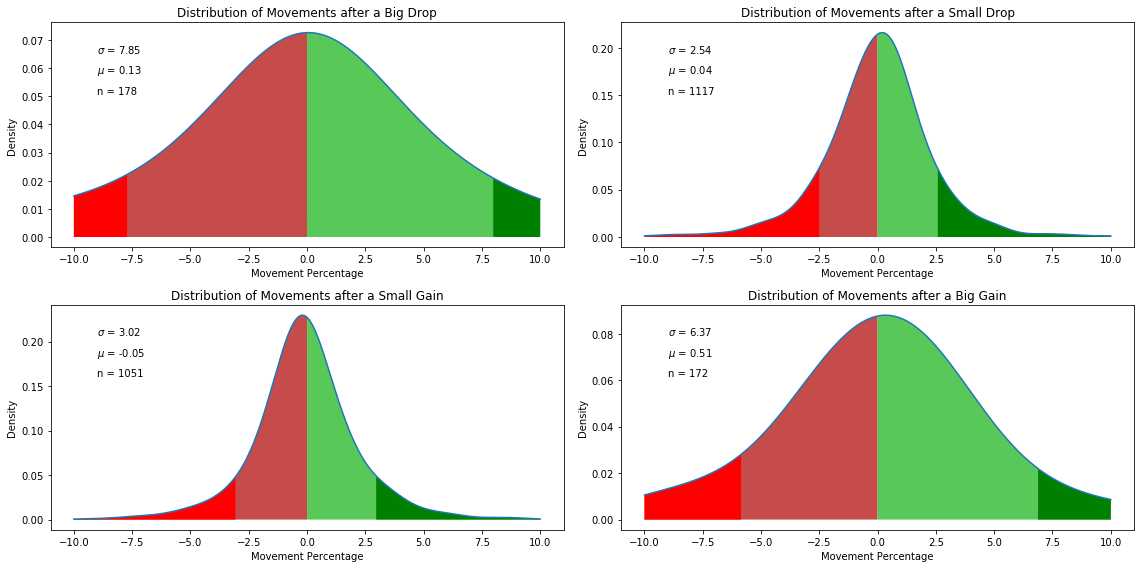

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
             NVDA
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



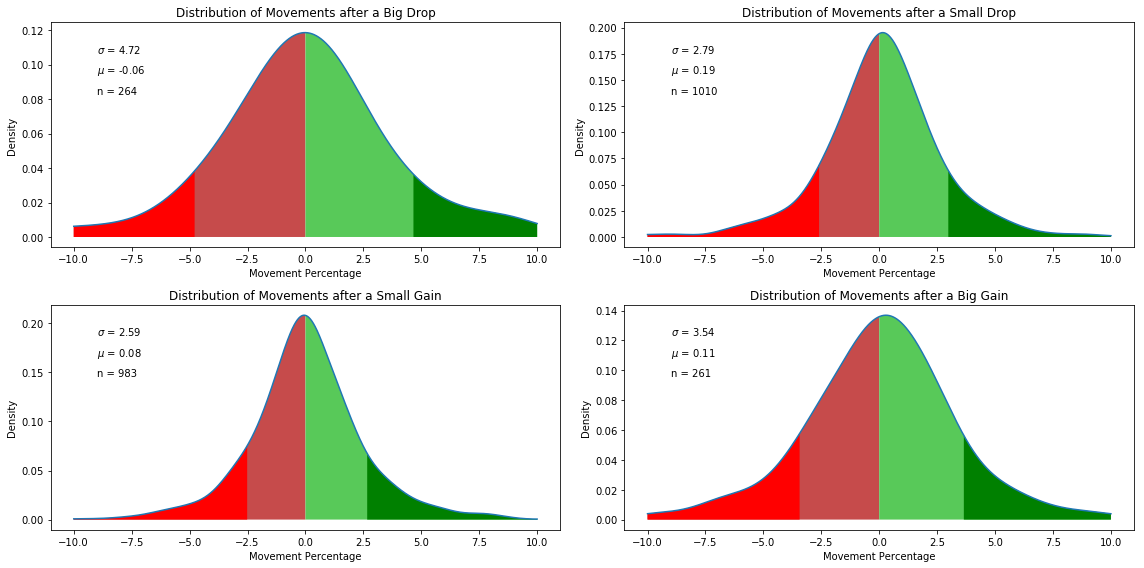

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
             NKE
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



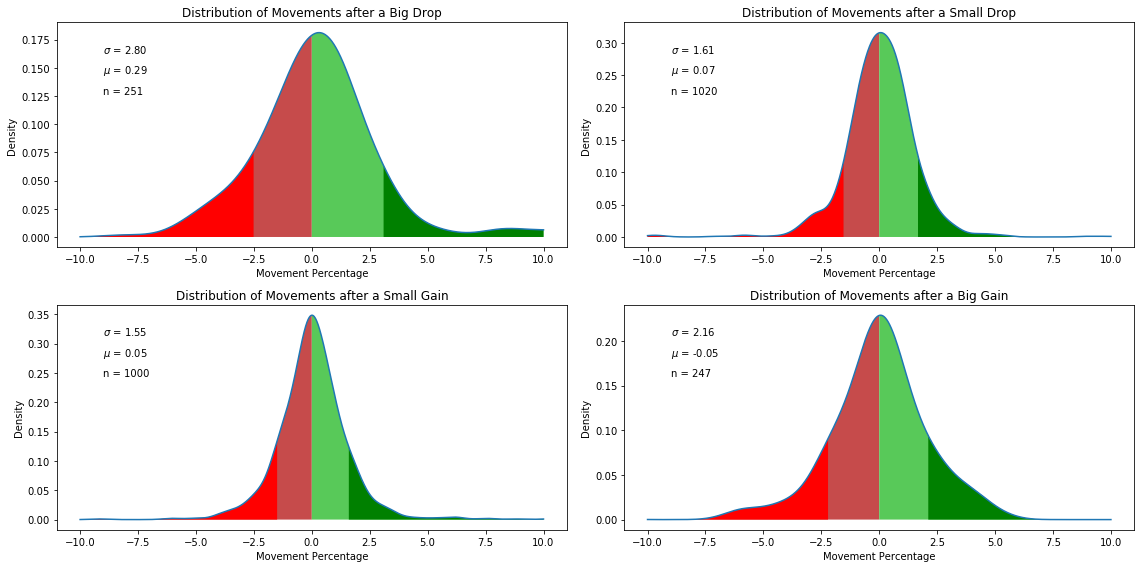

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
             SBUX
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



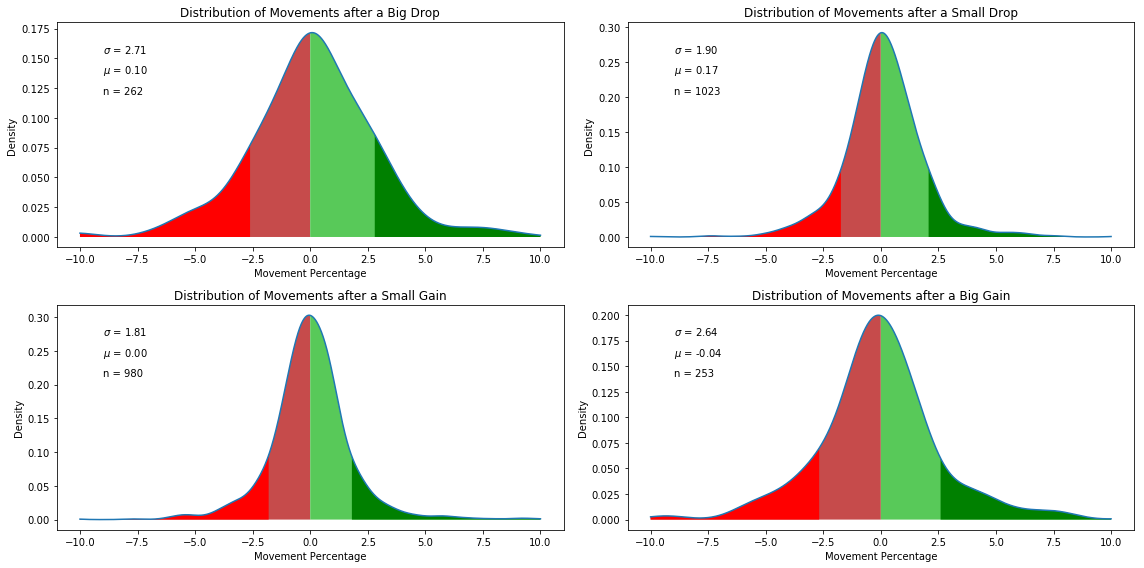

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
             AMD
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



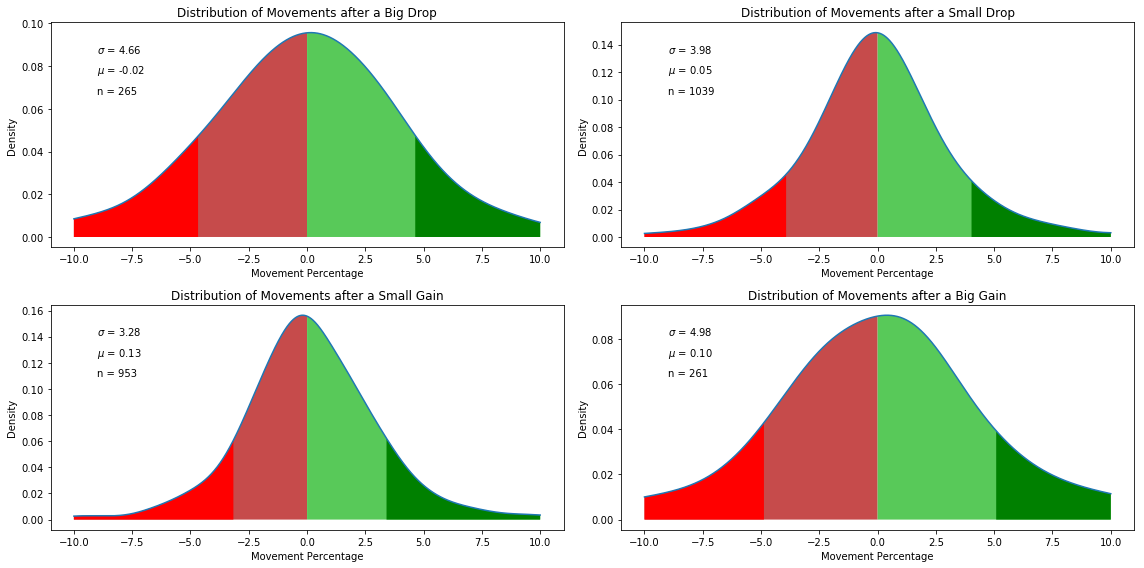

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
             MU
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



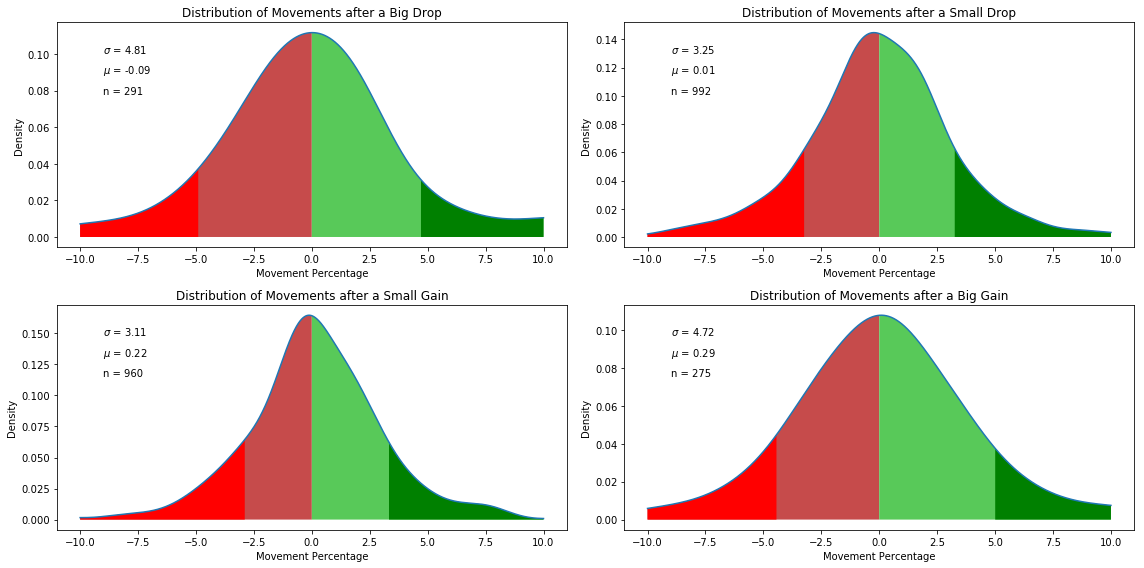

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
             SPY
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



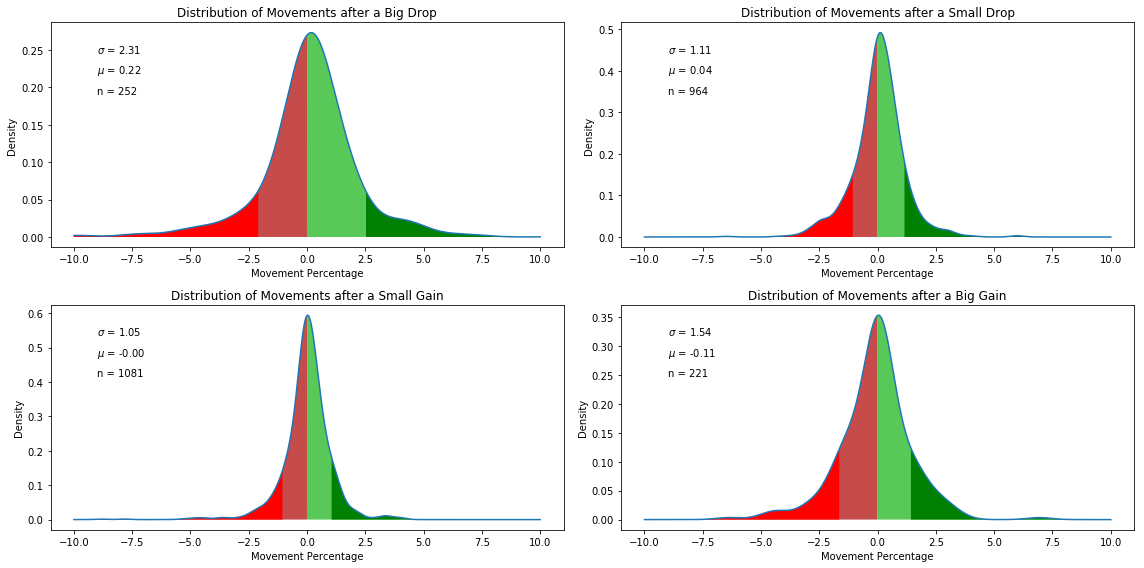

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
             GOOG
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



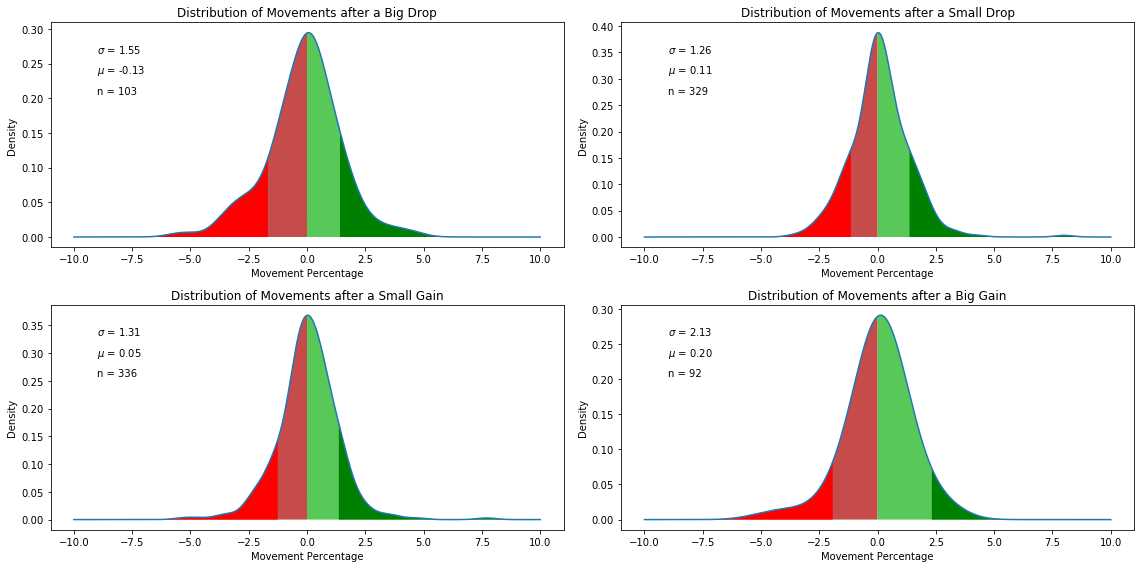

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
             TSLA
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



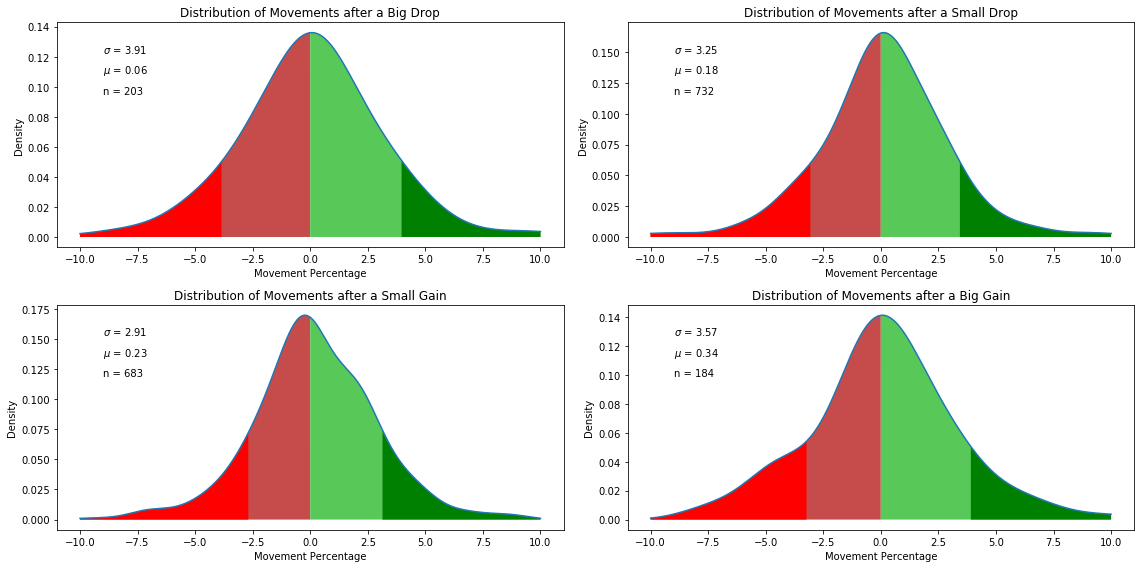

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
             FB
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



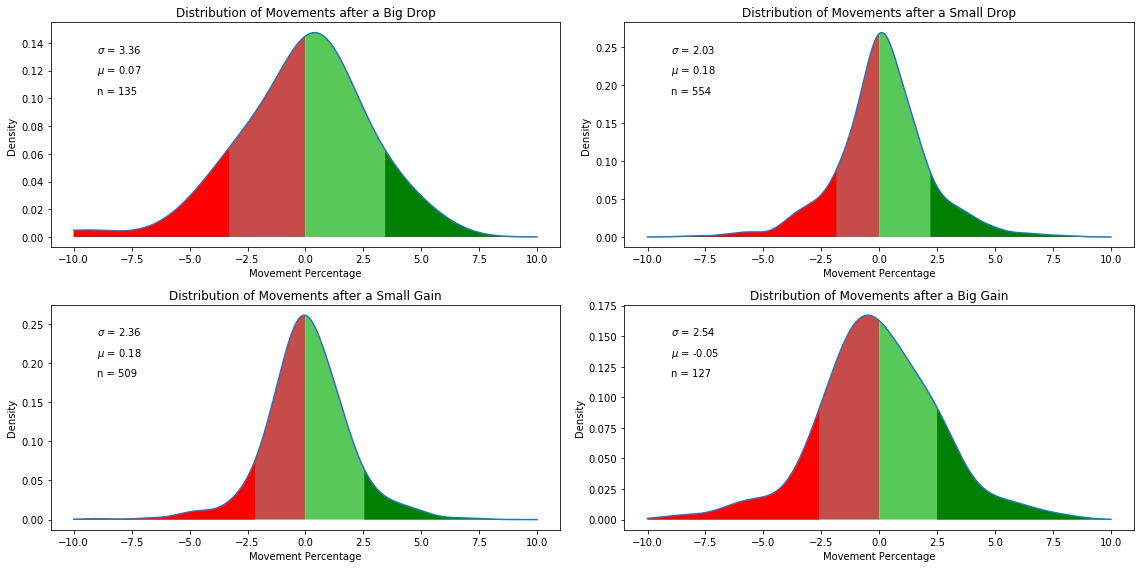

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
             INTC
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



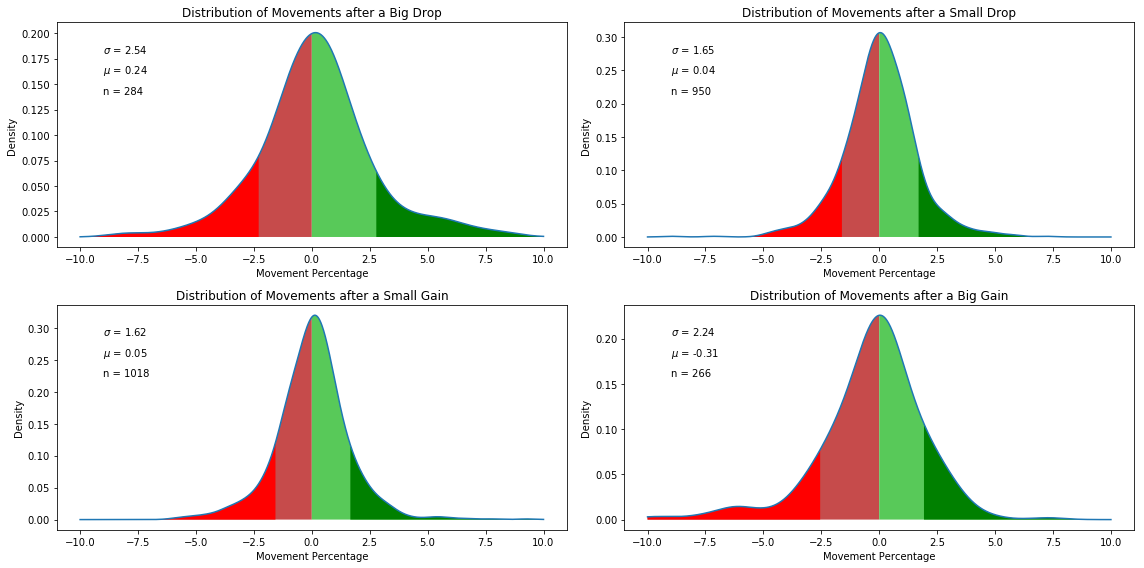

In [21]:
g = glob.glob('stock_data/*.csv')
all_cats = ['bd', 'sd', 'sg', 'bg']

for filename in g:
    df = pd.DataFrame()
    df = df.from_csv(filename)
    daily_movements = get_price_movement_percentages(df)
    movement_categories = categorize_movements(daily_movements)
    two_day_trends_linear = get_trends_linear(movement_categories, daily_movements, 2)
    ticker = ticker_from_csv(filename)
    
    movements_after_category = []
    for cat in all_cats:
        movements_after_category.append(get_movements_after_trend(cat, two_day_trends_linear))
        
    print('=-=-=-=-=-=-=-=-=-=-=-=-=-=-=')
    print('             ' + ticker)
    print('=-=-=-=-=-=-=-=-=-=-=-=-=-=-=')
    print()
    plt.figure(figsize=(16,8))
    
    ## Big Drop
    plt.subplot(2, 2, 1)
    x = movements_after_category[0]
    n = len(movements_after_category[0])
    plot_gaussian_categorical(x, title="Distribution of Movements after a Big Drop", n_cats=4, n_data=n)
    
    ## Small Drop
    plt.subplot(2, 2, 2)
    x = movements_after_category[1]
    n = len(movements_after_category[1])
    plot_gaussian_categorical(x, title="Distribution of Movements after a Small Drop", n_cats=4, n_data=n)

    ## Small Gain
    plt.subplot(2, 2, 3)
    x = movements_after_category[2]
    n = len(movements_after_category[2])
    plot_gaussian_categorical(x, title="Distribution of Movements after a Small Gain", n_cats=4, n_data=n)
    
    ## Big Gain
    plt.subplot(2, 2, 4)
    x = movements_after_category[3]
    n = len(movements_after_category[3])
    plot_gaussian_categorical(x, title="Distribution of Movements after a Big Gain", n_cats=4, n_data=n)
    
    plt.tight_layout()
    plt.show()